In [87]:
import pandas as pd
import numpy as np

In [248]:
delivery_df = pd.read_csv("delivery_orders_march.csv")

In [249]:
delivery_df.head(10)

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2.215677e+09,1583138397,1583384958,NaN,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2.219625e+09,1583309968,1583463236,1.583799e+09,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2.220979e+09,1583306434,1583459779,NaN,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2.221066e+09,1583419016,1583556341,NaN,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2.222479e+09,1583318305,1583480500,NaN,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...
5,2.222597e+09,1583328320,1583566909,NaN,C-846 park&shop opens Valeda/Sunrise) CompuWar...,33 sta.mesa 1929 hawthorn Metro Manila
6,2.222738e+09,1583148712,1583385752,1.583714e+09,"Ka-insong stockholme Lhuilier, polanco. malen ...","salcedo Midlands 980 WALL, 16C paraiso Mall（Ph..."
7,2.224695e+09,1583127841,1583836807,NaN,Reel zambo.ciyy puyat.cor road/infront #129A L...,Polar 75 mulawinan 1G-3 señora Text/Call 2P-01...
8,2.224705e+09,1583307779,1583388866,1.583712e+09,"Lumber,Naprada POT kadir Bagyan blanga FIRENDS...",skies dept. Crystal apello Stockroom.Star (DAG...
9,2.225138e+09,1583336611,1583813586,NaN,"Hengtong Buhaynasapa, Lask Southville8A Colgat...",9x Comfort Greenheights Lifehomes AANI Metro M...


In [91]:
#Take city from address
delivery_df['cleaned_buyeraddress'] = 0
delivery_df['cleaned_selleraddress'] = 0
list_of_cities = ['Metro Manila','Luzon','Visayas','Mindanao']
for city in list_of_cities:
    delivery_df['cleaned_buyeraddress'].loc[delivery_df['buyeraddress'].str.contains(city,case=False)==1] = city
    delivery_df['cleaned_selleraddress'].loc[delivery_df['selleraddress'].str.contains(city,case=False)==1] = city
delivery_df.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,cleaned_buyeraddress,cleaned_selleraddress
0,2.215677e+09,1583138397,1583384958,NaN,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...,Metro Manila,Metro Manila
1,2.219625e+09,1583309968,1583463236,1.583799e+09,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ...",Metro Manila,Metro Manila
2,2.220979e+09,1583306434,1583459779,NaN,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M...",Metro Manila,Metro Manila
3,2.221066e+09,1583419016,1583556341,NaN,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number...",Metro Manila,Metro Manila
4,2.222479e+09,1583318305,1583480500,NaN,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...,Luzon,Metro Manila


In [92]:
filt_delivery_df = delivery_df[['orderid','pick','1st_deliver_attempt','2nd_deliver_attempt','cleaned_buyeraddress','cleaned_selleraddress']]
filt_delivery_df.head()

orderid                   2.21962e+09
pick                       1583309968
1st_deliver_attempt        1583463236
2nd_deliver_attempt        1.5838e+09
cleaned_buyeraddress     Metro Manila
cleaned_selleraddress    Metro Manila
Name: 1, dtype: object

In [93]:
#Convert date format
#filt_delivery_df['cleaned_first'] = pd.Timestamp(filt_delivery_df['1st_deliver_attempt'], unit='s')
filt_delivery_df['cleaned_pick'] = delivery_df['pick'].apply(lambda x: pd.Timestamp(x, unit='s')).dt.date
filt_delivery_df['cleaned_first'] = delivery_df['1st_deliver_attempt'].apply(lambda x: pd.Timestamp(x, unit='s')).dt.date
filt_delivery_df['cleaned_second'] = delivery_df['2nd_deliver_attempt'].apply(lambda x: pd.Timestamp(x, unit='s')).dt.date

C:\Users\LEGION\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
filt_delivery_df = filt_delivery_df[['orderid','cleaned_pick','cleaned_first','cleaned_second','cleaned_buyeraddress','cleaned_selleraddress']]

orderid                   2.21962e+09
cleaned_pick               2020-03-04
cleaned_first              2020-03-06
cleaned_second             2020-03-10
cleaned_buyeraddress     Metro Manila
cleaned_selleraddress    Metro Manila
Name: 1, dtype: object

In [95]:
#Assign time boundary deliveries from SLA (Based on the buyer address and selleraddress)
#Create SLA dataframe
SLA_df = pd.DataFrame({'cleaned_selleraddress':['Metro Manila','Metro Manila', 'Metro Manila','Metro Manila','Luzon','Luzon','Luzon','Luzon',
                                'Visayas','Visayas','Visayas','Visayas','Mindanao','Mindanao','Mindanao','Mindanao'],
                       'cleaned_buyeraddress':['Metro Manila','Luzon','Visayas','Mindanao','Metro Manila','Luzon','Visayas','Mindanao',
                               'Metro Manila','Luzon','Visayas','Mindanao','Metro Manila','Luzon','Visayas','Mindanao']
                       ,'boundary': [3,5,7,7,5,5,7,7,7,7,7,7,7,7,7,7]})
SLA_df

,cleaned_selleraddress,cleaned_buyeraddress,boundary
0,Metro Manila,Metro Manila,3
1,Metro Manila,Luzon,5
2,Metro Manila,Visayas,7
3,Metro Manila,Mindanao,7
4,Luzon,Metro Manila,5
5,Luzon,Luzon,5
6,Luzon,Visayas,7
7,Luzon,Mindanao,7
8,Visayas,Metro Manila,7
9,Visayas,Luzon,7


In [96]:
#Join on the filtered delivery dataframe
filt_delivery_df = filt_delivery_df.merge(SLA_df,how='inner',on=['cleaned_selleraddress','cleaned_buyeraddress'])
filt_delivery_df.sort_values(by='orderid')

,orderid,cleaned_pick,cleaned_first,cleaned_second,cleaned_buyeraddress,cleaned_selleraddress,boundary
475830,2.195010e+09,2020-03-04,2020-03-09,2020-03-13,Metro Manila,Metro Manila,3
250062,2.199600e+09,2020-03-05,2020-03-09,NaT,Metro Manila,Metro Manila,3
320611,2.199600e+09,2020-03-04,2020-03-06,NaT,Metro Manila,Metro Manila,3
904903,2.199666e+09,2020-03-02,2020-03-07,NaT,Visayas,Metro Manila,7
818314,2.200010e+09,2020-03-02,2020-03-09,NaT,Visayas,Metro Manila,7
...,...,...,...,...,...,...,...
429242,3.150650e+13,2020-04-04,2020-04-06,NaT,Metro Manila,Metro Manila,3
421430,3.150680e+13,2020-04-03,2020-04-06,NaT,Metro Manila,Metro Manila,3
421429,3.150680e+13,2020-04-03,2020-04-06,NaT,Metro Manila,Metro Manila,3
551033,3.150710e+13,2020-04-03,2020-04-07,NaT,Luzon,Metro Manila,5


In [98]:
filt_delivery_df['boundary_second'] = 3
filt_delivery_df.head()

In [101]:
filt_delivery_df['cleaned_pick'] = pd.to_datetime(filt_delivery_df['cleaned_pick'])
filt_delivery_df['cleaned_first'] = pd.to_datetime(filt_delivery_df['cleaned_first'])
filt_delivery_df['cleaned_second'] = pd.to_datetime(filt_delivery_df['cleaned_second'])
filt_delivery_df.head()

,orderid,cleaned_pick,cleaned_first,cleaned_second,cleaned_buyeraddress,cleaned_selleraddress,boundary,boundary_second
0,2.215677e+09,2020-03-02,2020-03-05,NaT,Metro Manila,Metro Manila,3,3
1,2.219625e+09,2020-03-04,2020-03-06,2020-03-10,Metro Manila,Metro Manila,3,3
2,2.220979e+09,2020-03-04,2020-03-06,NaT,Metro Manila,Metro Manila,3,3
3,2.221066e+09,2020-03-05,2020-03-07,NaT,Metro Manila,Metro Manila,3,3
4,2.222597e+09,2020-03-04,2020-03-07,NaT,Metro Manila,Metro Manila,3,3


In [102]:
filt_delivery_df.dtypes

orderid                         float64
cleaned_pick             datetime64[ns]
cleaned_first            datetime64[ns]
cleaned_second           datetime64[ns]
cleaned_buyeraddress             object
cleaned_selleraddress            object
boundary                          int64
boundary_second                   int64
dtype: object

In [103]:
print("Minimum pick: {}".format(filt_delivery_df['cleaned_pick'].min(skipna=True)))
print("Maximum pick: {}".format(filt_delivery_df['cleaned_pick'].max(skipna=True)))
print("Minimum first attempt: {}".format(filt_delivery_df['cleaned_first'].min(skipna=True)))
print("Maximum first attempt: {}".format(filt_delivery_df['cleaned_first'].max(skipna=True)))
print("Minimum second attempt: {}".format(filt_delivery_df['cleaned_second'].min(skipna=True)))
print("Maximum second attempt: {}".format(filt_delivery_df['cleaned_second'].max(skipna=True)))

Minimum pick: 2020-03-01 00:00:00
Maximum pick: 2020-04-06 00:00:00
Minimum first attempt: 2020-03-02 00:00:00
Maximum first attempt: 2020-04-07 00:00:00
Minimum second attempt: 2020-03-03 00:00:00
Maximum second attempt: 2020-04-07 00:00:00


In [104]:
#Count days difference

#List all holiday dates
holiday = ['2020-03-25','2020-03-30','2020-03-31']
#sunday: 03-08,03-15,03-22,03-29,04-05
holiday = pd.to_datetime(holiday)
holiday = holiday.values.astype('datetime64[D]')

filt_delivery_df['first_diff'] = np.busday_count(filt_delivery_df['cleaned_pick'].values.astype('datetime64[D]'),filt_delivery_df['cleaned_first'].values.astype('datetime64[D]'),weekmask='1111110',holidays=holiday)
filt_delivery_df['second_diff'] = 'NaT'
filt_delivery_df['second_diff'].loc[filt_delivery_df['cleaned_second'].isna()==0] = np.busday_count(filt_delivery_df['cleaned_first'].loc[filt_delivery_df['cleaned_second'].isna()==0].values.astype('datetime64[D]'),filt_delivery_df['cleaned_second'].loc[filt_delivery_df['cleaned_second'].isna()==0].values.astype('datetime64[D]'),weekmask='1111110',holidays=holiday)
filt_delivery_df.head()

,orderid,cleaned_pick,cleaned_first,cleaned_second,cleaned_buyeraddress,cleaned_selleraddress,boundary,boundary_second,first_diff,second_diff
0,2.215677e+09,2020-03-02,2020-03-05,NaT,Metro Manila,Metro Manila,3,3,3,NaT
1,2.219625e+09,2020-03-04,2020-03-06,2020-03-10,Metro Manila,Metro Manila,3,3,2,3
2,2.220979e+09,2020-03-04,2020-03-06,NaT,Metro Manila,Metro Manila,3,3,2,NaT
3,2.221066e+09,2020-03-05,2020-03-07,NaT,Metro Manila,Metro Manila,3,3,2,NaT
4,2.222597e+09,2020-03-04,2020-03-07,NaT,Metro Manila,Metro Manila,3,3,3,NaT


In [105]:
#Logics procedure to create results dataframe
filt_delivery_df['is_late'] = 0

#Do not have second attempts
filt_delivery_df['is_late'].loc[filt_delivery_df['cleaned_second'].isna()==1] = filt_delivery_df['first_diff'].loc[filt_delivery_df['cleaned_second'].isna()==1]>filt_delivery_df['boundary'].loc[filt_delivery_df['cleaned_second'].isna()==1] 
#Do have second attempts
filt_delivery_df['is_late'].loc[filt_delivery_df['cleaned_second'].isna()==0] = (filt_delivery_df['first_diff'].loc[filt_delivery_df['cleaned_second'].isna()==0]>filt_delivery_df['boundary'].loc[filt_delivery_df['cleaned_second'].isna()==0]) | (filt_delivery_df['second_diff'].loc[filt_delivery_df['cleaned_second'].isna()==0]>filt_delivery_df['boundary_second'].loc[filt_delivery_df['cleaned_second'].isna()==0])
filt_delivery_df['is_late'] = filt_delivery_df['is_late'].astype('int')
filt_delivery_df.head()

,orderid,cleaned_pick,cleaned_first,cleaned_second,cleaned_buyeraddress,cleaned_selleraddress,boundary,boundary_second,first_diff,second_diff,is_late
0,2.215677e+09,2020-03-02,2020-03-05,NaT,Metro Manila,Metro Manila,3,3,3,NaT,0
1,2.219625e+09,2020-03-04,2020-03-06,2020-03-10,Metro Manila,Metro Manila,3,3,2,3,0
2,2.220979e+09,2020-03-04,2020-03-06,NaT,Metro Manila,Metro Manila,3,3,2,NaT,0
3,2.221066e+09,2020-03-05,2020-03-07,NaT,Metro Manila,Metro Manila,3,3,2,NaT,0
4,2.222597e+09,2020-03-04,2020-03-07,NaT,Metro Manila,Metro Manila,3,3,3,NaT,0


In [106]:
filt_delivery_df['is_late'].value_counts()

0    796404
1    251979
Name: is_late, dtype: int64

C:\Users\LEGION\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


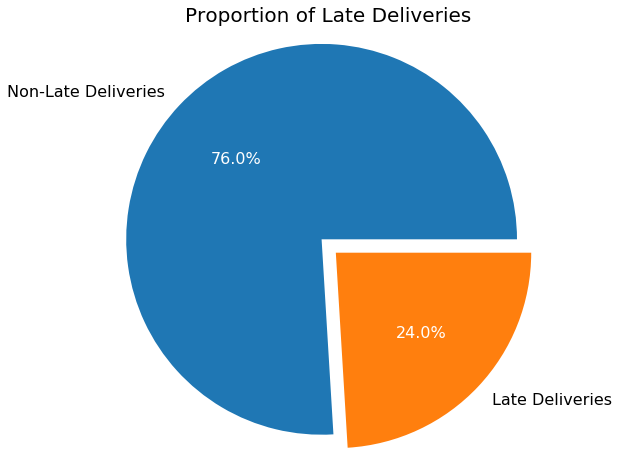

In [107]:
##DATA VISUALIZATION
from matplotlib import pyplot as plt
#1. Proportion of late deliveries
propo_df = pd.DataFrame(filt_delivery_df['is_late'].value_counts())
my_labels = "Non-Late Deliveries","Late Deliveries"
my_explode = (0, 0.1)
plt.figure(figsize=[8,8])
patches, texts, autotexts = plt.pie(propo_df,labels=my_labels,explode=my_explode,autopct='%1.1f%%')
texts[0].set_fontsize(16)
texts[1].set_fontsize(16)
autotexts[0].set_fontsize(16)
autotexts[1].set_fontsize(16)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Proportion of Late Deliveries',fontsize=20)
plt.axis('equal')
plt.savefig('pie_islate'+'.png',bbox_inches='tight')
plt.show()


In [109]:
filt_delivery_df['pair_address'] = filt_delivery_df['cleaned_selleraddress'].str.cat(filt_delivery_df['cleaned_buyeraddress'],sep='-') 
address_islate_df = pd.DataFrame(filt_delivery_df['pair_address'].loc[filt_delivery_df['is_late']==1].value_counts())
address_total_df = pd.DataFrame(filt_delivery_df['pair_address'].value_counts())
address_islate_df

,pair_address
Metro Manila-Metro Manila,124382
Metro Manila-Visayas,45474
Metro Manila-Mindanao,41278
Metro Manila-Luzon,40698
Luzon-Metro Manila,52
Luzon-Visayas,39
Luzon-Luzon,31
Luzon-Mindanao,25


In [128]:
address_total_df = address_islate_df.copy()
address_total_df['pair_address'] = 0
address_total_df['pair_address']
i = 0
for address in address_total_df.index:
    address_total_df['pair_address'].iloc[i] = filt_delivery_df.loc[filt_delivery_df['pair_address']==address].shape[0]
    i = i+1
address_total_df

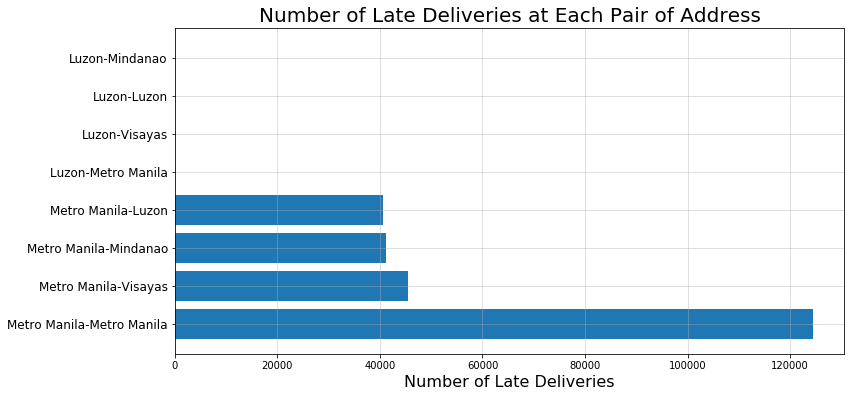

In [153]:
plt.figure(figsize=[12,6])
texts = plt.barh(address_islate_df.index,address_islate_df['pair_address'])
plt.title("Number of Late Deliveries at Each Pair of Address",fontsize=20)
plt.savefig('late_address'+'.png',bbox_inches='tight')
plt.xlabel('Number of Late Deliveries',fontsize=16)
plt.yticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('late_address'+'.png',bbox_inches='tight')
plt.show()

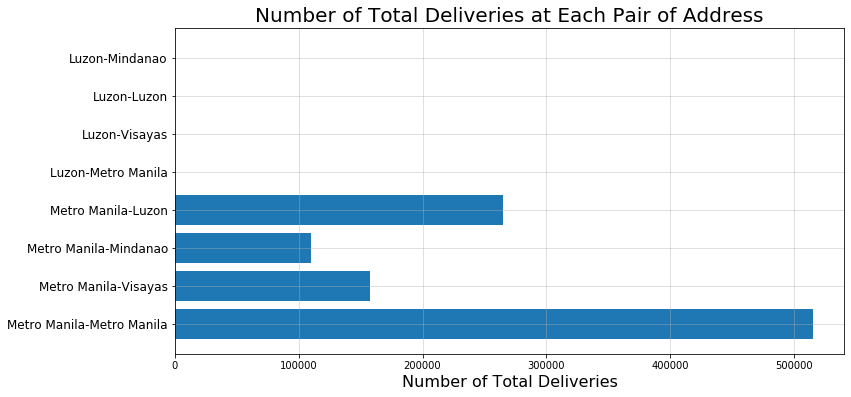

In [156]:
plt.figure(figsize=[12,6])
texts = plt.barh(address_total_df.index,address_total_df['pair_address'])
plt.title("Number of Total Deliveries at Each Pair of Address",fontsize=20)
plt.xlabel('Number of Total Deliveries',fontsize=16)
plt.yticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('total_address'+'.png',bbox_inches='tight')
plt.show()

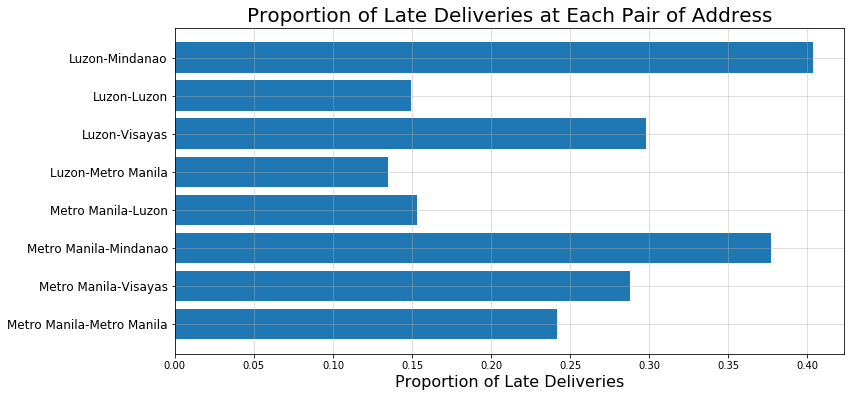

In [157]:
propo_address_islate_df = address_islate_df/address_total_df
propo_address_islate_df = propo_address_islate_df.reindex(['Metro Manila-Metro Manila', 'Metro Manila-Visayas',
       'Metro Manila-Mindanao', 'Metro Manila-Luzon', 'Luzon-Metro Manila',
       'Luzon-Visayas', 'Luzon-Luzon', 'Luzon-Mindanao'])
plt.figure(figsize=[12,6])
texts = plt.barh(propo_address_islate_df.index,propo_address_islate_df['pair_address'])
plt.title("Proportion of Late Deliveries at Each Pair of Address",fontsize=20)
plt.xlabel('Proportion of Late Deliveries',fontsize=16)
plt.yticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('proportion_late_address'+'.png',bbox_inches='tight')
plt.show()

In [165]:
buat_cor_dis_late_df = propo_address_islate_df.copy()
buat_cor_dis_late_df['distance']=0
buat_cor_dis_late_df['distance'].iloc[0] = 0
buat_cor_dis_late_df['distance'].iloc[1] = 484.34
buat_cor_dis_late_df['distance'].iloc[2] = 721.82
buat_cor_dis_late_df['distance'].iloc[3] = 216.63
buat_cor_dis_late_df['distance'].iloc[4] = 216.63
buat_cor_dis_late_df['distance'].iloc[5] = 659.81
buat_cor_dis_late_df['distance'].iloc[6] = 0
buat_cor_dis_late_df['distance'].iloc[7] = 922.86
buat_cor_dis_late_df['distance']
buat_cor_dis_late_df

,pair_address,distance
Metro Manila-Metro Manila,0.241581,0.00
Metro Manila-Visayas,0.287974,484.34
Metro Manila-Mindanao,0.376824,721.82
Metro Manila-Luzon,0.153416,216.63
Luzon-Metro Manila,0.134715,216.63
Luzon-Visayas,0.297710,659.81
Luzon-Luzon,0.149038,0.00
Luzon-Mindanao,0.403226,922.86


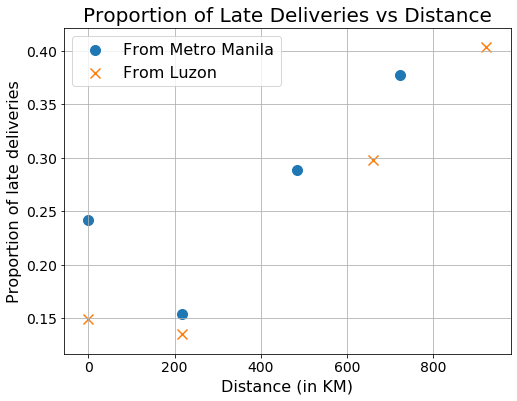

In [193]:
plt.figure(figsize=[8,6])
plt.scatter(buat_cor_dis_late_df['distance'].iloc[:4],buat_cor_dis_late_df['pair_address'].iloc[:4],s=100)
plt.scatter(buat_cor_dis_late_df['distance'].iloc[4:],buat_cor_dis_late_df['pair_address'].iloc[4:],s=100,marker='x')
plt.grid()
plt.title('Proportion of Late Deliveries vs Distance',fontsize=20)
plt.ylabel('Proportion of late deliveries',fontsize=16)
plt.xlabel('Distance (in KM)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["From Metro Manila", "From Luzon"], loc ="upper left",fontsize=16) 
plt.savefig('proportion_late_vs_distance'+'.png',bbox_inches='tight')
plt.show()

In [201]:
only_late_df = filt_delivery_df.loc[filt_delivery_df['is_late']==1].copy()

In [235]:
only_late_df = filt_delivery_df.loc[(filt_delivery_df['is_late']==1) & (filt_delivery_df['second_diff']!='NaT')].copy()
only_late_df['late_first_only'] = (only_late_df['first_diff']>only_late_df['boundary']) & (only_late_df['second_diff']<=only_late_df['boundary_second'])
only_late_df['late_second_only'] = (only_late_df['first_diff']<=only_late_df['boundary']) & (only_late_df['second_diff']>only_late_df['boundary_second'])
only_late_df['both'] = (only_late_df['first_diff']>only_late_df['boundary']) & (only_late_df['second_diff']>only_late_df['boundary_second'])

In [236]:
late_first_only = sum(only_late_df['late_first_only'])
late_second_only = sum(only_late_df['late_second_only'])
late_both = sum(only_late_df['both'])
first_and_second_df = pd.DataFrame({'late_status':[late_first_only,late_second_only,late_both]})
first_and_second_df

C:\Users\LEGION\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


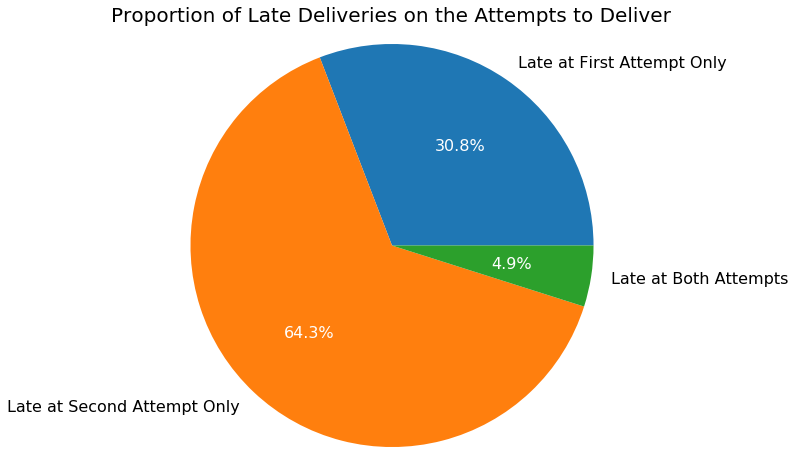

In [247]:
propo_df = pd.DataFrame(filt_delivery_df['is_late'].value_counts())
my_labels = "Late at First Attempt Only","Late at Second Attempt Only","Late at Both Attempts"
#my_explode = (0, 0.1)
plt.figure(figsize=[8,8])
patches, texts, autotexts = plt.pie(first_and_second_df,labels=my_labels,autopct='%1.1f%%')
texts[0].set_fontsize(16)
texts[1].set_fontsize(16)
texts[2].set_fontsize(16)
autotexts[0].set_fontsize(16)
autotexts[1].set_fontsize(16)
autotexts[2].set_fontsize(16)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Proportion of Late Deliveries on the Attempts to Deliver',fontsize=20)
plt.axis('equal')
plt.savefig('pie_islate_attempt'+'.png',bbox_inches='tight')
plt.show()
